<a href="https://colab.research.google.com/github/simasaadi/Urban-Sustainability-Score-Drivers-Trade-offs-and-Scenario-Simulator/blob/main/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

RANDOM_STATE = 42


In [7]:
print("Shape:", df.shape)
display(df.head(3))


Shape: (3476, 16)


,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
0,0.367915,0.393821,0.428129,0.414830,0.238555,0.921950,0.126449,0.547160,0.932412,0.382358,0.446242,0.0,0.0,1.0,0.0,0.259239
1,0.414306,0.608445,0.658481,0.490982,0.917681,0.178213,0.325124,0.764042,0.903241,0.377167,0.936824,0.0,1.0,0.0,0.0,0.576923
2,0.827902,0.444679,0.263853,0.264529,0.077883,0.295159,0.042150,0.575736,0.208098,0.237949,0.463054,0.0,0.0,0.0,1.0,0.252844


In [8]:
print("Columns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)

missing = df.isna().sum().sort_values(ascending=False)
print("\nMissing values (non-zero only):")
print(missing[missing > 0])

dup_count = df.duplicated().sum()
print("\nDuplicate rows:", dup_count)


Columns: ['building_density', 'road_connectivity', 'public_transport_access', 'air_quality_index', 'green_cover_percentage', 'carbon_footprint', 'population_density', 'crime_rate', 'avg_income', 'renewable_energy_usage', 'disaster_risk_index', 'land_use_type_Commercial', 'land_use_type_Green Space', 'land_use_type_Industrial', 'land_use_type_Residential', 'urban_sustainability_score']

Dtypes:
 building_density              float64
road_connectivity             float64
public_transport_access       float64
air_quality_index             float64
green_cover_percentage        float64
carbon_footprint              float64
population_density            float64
crime_rate                    float64
avg_income                    float64
renewable_energy_usage        float64
disaster_risk_index           float64
land_use_type_Commercial      float64
land_use_type_Green Space     float64
land_use_type_Industrial      float64
land_use_type_Residential     float64
urban_sustainability_score    fl

In [10]:
land_use_cols = [
    "land_use_type_Commercial",
    "land_use_type_Green Space",
    "land_use_type_Industrial",
    "land_use_type_Residential",
]

# Ensure these columns exist
for c in land_use_cols:
    assert c in df.columns, f"Missing expected land-use column: {c}"

row_sum = df[land_use_cols].sum(axis=1)

print("Land-use one-hot sum (value counts):")
print(row_sum.round(6).value_counts().head(10))

assert (row_sum.round(6) == 1.0).all(), "Land-use one-hot columns do not sum to 1 for all rows."

print("Land-use one-hot validation ✅")


Land-use one-hot sum (value counts):
1.0    3476
Name: count, dtype: int64
Land-use one-hot validation ✅


count    3476.000000
mean        0.482871
std         0.169391
min         0.000000
25%         0.360202
50%         0.482517
75%         0.606625
max         1.000000
Name: urban_sustainability_score, dtype: float64


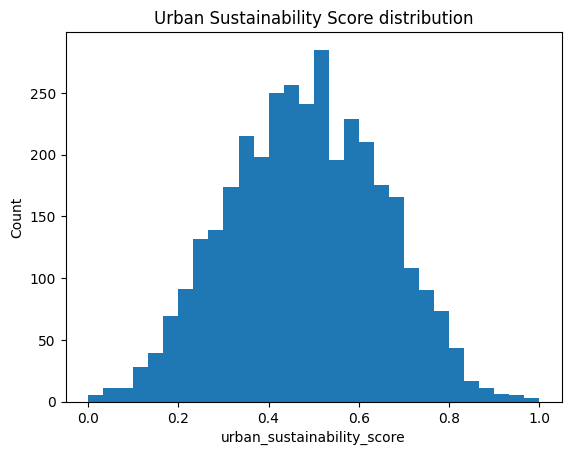

In [11]:
TARGET = "urban_sustainability_score"
assert TARGET in df.columns, f"Missing target column: {TARGET}"

print(df[TARGET].describe())

plt.figure()
plt.hist(df[TARGET], bins=30)
plt.title("Urban Sustainability Score distribution")
plt.xlabel(TARGET)
plt.ylabel("Count")
plt.show()


In [12]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", len(numeric_cols))

desc = df[numeric_cols].describe().T
desc["range"] = desc["max"] - desc["min"]
desc = desc.sort_values("range", ascending=False)

display(desc.head(12))


Numeric columns: 16


,count,mean,std,min,25%,50%,75%,max,range
building_density,3476.0,0.496345,0.287770,0.0,0.249740,0.495439,0.745671,1.0,1.0
urban_sustainability_score,3476.0,0.482871,0.169391,0.0,0.360202,0.482517,0.606625,1.0,1.0
disaster_risk_index,3476.0,0.494002,0.287720,0.0,0.243494,0.493688,0.739163,1.0,1.0
renewable_energy_usage,3476.0,0.499881,0.290146,0.0,0.245107,0.498264,0.752263,1.0,1.0
green_cover_percentage,3476.0,0.505579,0.288395,0.0,0.256761,0.513606,0.757637,1.0,1.0
road_connectivity,3476.0,0.490205,0.287484,0.0,0.241686,0.483176,0.734190,1.0,1.0
public_transport_access,3476.0,0.501397,0.287163,0.0,0.256093,0.499168,0.752051,1.0,1.0
air_quality_index,3476.0,0.494445,0.287185,0.0,0.246493,0.488978,0.745491,1.0,1.0
crime_rate,3476.0,0.499659,0.284553,0.0,0.255697,0.499045,0.739293,1.0,1.0
population_density,3476.0,0.502158,0.286912,0.0,0.254415,0.505622,0.750379,1.0,1.0


In [13]:
corr = df[numeric_cols].corr(numeric_only=True)[TARGET].sort_values(ascending=False)
display(corr)


,urban_sustainability_score
urban_sustainability_score,1.000000
green_cover_percentage,0.690025
renewable_energy_usage,0.481232
public_transport_access,0.203036
air_quality_index,0.018695
avg_income,0.018001
road_connectivity,0.016109
land_use_type_Green Space,0.008978
building_density,0.005958
land_use_type_Industrial,0.005715


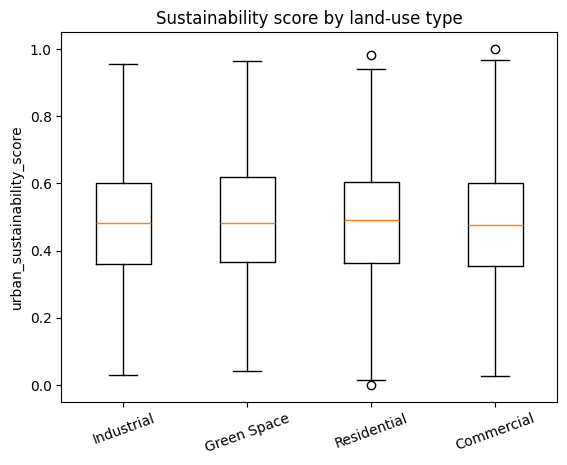

In [14]:
# Convert one-hot to a single label
land_use_label = df[land_use_cols].idxmax(axis=1).str.replace("land_use_type_", "", regex=False)

plt.figure()
plt.boxplot(
    [df.loc[land_use_label == lu, TARGET] for lu in land_use_label.unique()],
    tick_labels=land_use_label.unique(),
    vert=True
)
plt.title("Sustainability score by land-use type")
plt.ylabel(TARGET)
plt.xticks(rotation=20)
plt.show()


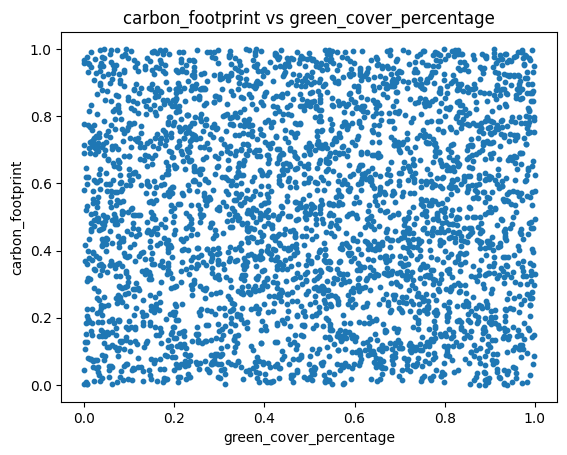

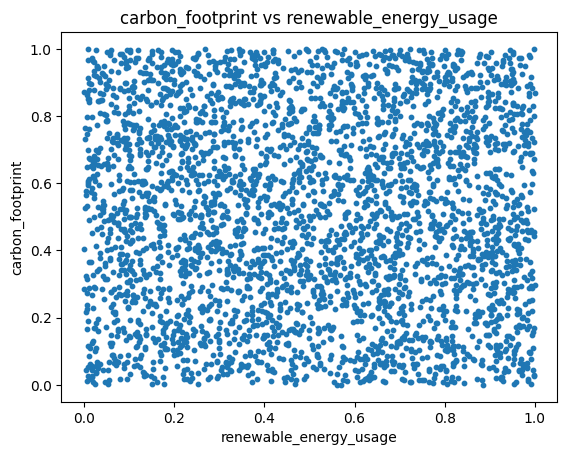

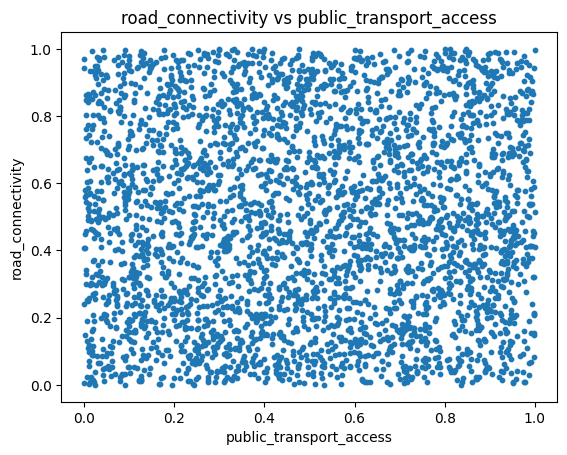

In [15]:
pairs = [
    ("green_cover_percentage", "carbon_footprint"),
    ("renewable_energy_usage", "carbon_footprint"),
    ("public_transport_access", "road_connectivity"),
]

for x, y in pairs:
    if x in df.columns and y in df.columns:
        plt.figure()
        plt.scatter(df[x], df[y], s=10)
        plt.title(f"{y} vs {x}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()
    else:
        print(f"Skipping (missing columns): {x}, {y}")


In [16]:
eda_summary = {
    "rows": df.shape[0],
    "cols": df.shape[1],
    "duplicate_rows": int(df.duplicated().sum()),
    "missing_cells_total": int(df.isna().sum().sum()),
    "target_min": float(df[TARGET].min()),
    "target_max": float(df[TARGET].max()),
    "target_mean": float(df[TARGET].mean()),
    "target_std": float(df[TARGET].std()),
}

eda_summary


{'rows': 3476,
 'cols': 16,
 'duplicate_rows': 0,
 'missing_cells_total': 0,
 'target_min': 0.0,
 'target_max': 1.0000000000000002,
 'target_mean': 0.4828712697857149,
 'target_std': 0.16939136277047373}

In [17]:
limitations = [
    "Most indicators appear normalized (0–1). Interpret as relative scores unless original units are provided.",
    "Some variables (e.g., air quality index) may have ambiguous directionality without definition.",
    "Dataset lacks identifiers for real cities; results describe patterns in the dataset rather than specific places."
]
limitations


['Most indicators appear normalized (0–1). Interpret as relative scores unless original units are provided.',
 'Some variables (e.g., air quality index) may have ambiguous directionality without definition.',
 'Dataset lacks identifiers for real cities; results describe patterns in the dataset rather than specific places.']